### 예제
1. csv폴더에서 4개의 파일을 로드 (tran1, tran2, tran_d_1, trand_2)
2. tran_1과 tran_2는 단순한 행 추가 결합(유니언 결합)
3. tran_d_1과 trand_d_2도 유니언 결합
4. 2번,3번 과정에서 나온 데이터프레임을 특정 조건에 맞춰서 2번 데이터프레임 기준으로 열 추가 결합 (조인 결합)
5. csv 폴더에 있는 2개의 파일 로드(custom_master, item_master)
6. 4번 과정에서 나온 데이터프레임과 custom_master 조인 결합
7. 6번 과정에서 나온 데이터프레임과 item_master 조인결합
8. 결합이된 데이터프레임에서 quantity 컬럼과 item_price 컬럼의 데이터를 가지고 total_price라는 파생 변수를 생성 (total_price = item_price*quantitiy)

In [312]:
import os

In [313]:
import pandas as pd

In [314]:
tran_1 = pd.read_csv("../csv/tran_1.csv")
tran_2 = pd.read_csv("../csv/tran_2.csv")
tran_d_1 = pd.read_csv("../csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("../csv/tran_d_2.csv")

In [315]:
result = pd.concat([tran_1, tran_2], axis = 0, ignore_index= True)
print(result)


     transaction_id   price         payment_date customer_id
0       T0000000113  210000  2019-02-01 01:36:57    PL563502
1       T0000000114   50000  2019-02-01 01:37:23    HD678019
2       T0000000115  120000  2019-02-01 02:34:19    HD298120
3       T0000000116  210000  2019-02-01 02:47:23    IK452215
4       T0000000117  170000  2019-02-01 04:33:46    PL542865
...             ...     ...                  ...         ...
6781    T0000006894  180000  2019-07-31 21:20:44    HI400734
6782    T0000006895   85000  2019-07-31 21:52:48    AS339451
6783    T0000006896  100000  2019-07-31 23:35:25    OA027325
6784    T0000006897   85000  2019-07-31 23:39:35    TS624738
6785    T0000006898   85000  2019-07-31 23:41:38    AS834214

[6786 rows x 4 columns]


In [316]:
result1 = pd.concat([tran_d_1, tran_d_2], axis = 0, ignore_index= True)
print(result1)


      detail_id transaction_id item_id  quantity
0             0    T0000000113    S005         1
1             1    T0000000114    S001         1
2             2    T0000000115    S003         1
3             3    T0000000116    S005         1
4             4    T0000000117    S002         2
...         ...            ...     ...       ...
7139       7139    T0000006894    S004         1
7140       7140    T0000006895    S002         1
7141       7141    T0000006896    S001         2
7142       7142    T0000006897    S002         1
7143       7143    T0000006898    S002         1

[7144 rows x 4 columns]


In [317]:
transcation_id = pd.merge(result, result1, on = 'transaction_id', how = "left")

In [318]:
customer = pd.read_csv("../csv/customer_master.csv")
item = pd.read_csv("../csv/item_master.csv")

In [319]:
customer.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [320]:
result2 =pd.merge(transcation_id, customer, on = 'customer_id', how = "left")

In [321]:
final_r = pd.merge(result2, item, on = 'item_id', how = "inner")

In [322]:
pd.merge(final_r, item, on = 'item_id', how = "inner")

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name_x,item_price_x,item_name_y,item_price_y
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,PC-E,210000
1,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,PC-E,210000
2,T0000000121,210000,2019-02-01 06:40:14,HD218970,8,S005,1,XXXXX,C01,F,2018-04-02 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-E,210000,PC-E,210000
3,T0000000128,210000,2019-02-01 17:20:02,IK234815,15,S005,1,XXX,C02,F,2018-05-12 00:00:00,NaN,CA2,0.0,PC-E,210000,PC-E,210000
4,T0000000130,210000,2019-02-01 19:44:40,AS614406,17,S005,1,XXXXX,C03,F,2015-10-01 00:00:00,NaN,CA1,0.0,PC-E,210000,PC-E,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006857,180000,2019-07-30 22:45:06,IK081842,7100,S004,1,XXXXX,C03,M,2019-01-08 00:00:00,NaN,CA1,0.0,PC-D,180000,PC-D,180000
7140,T0000006871,180000,2019-07-31 05:56:08,HD753835,7115,S004,1,XXXXXX,C01,F,2017-04-01 00:00:00,NaN,CA1,0.0,PC-D,180000,PC-D,180000
7141,T0000006872,180000,2019-07-31 05:58:51,OA781562,7116,S004,1,XXX,C03,M,2018-02-01 00:00:00,NaN,CA1,0.0,PC-D,180000,PC-D,180000
7142,T0000006893,180000,2019-07-31 21:17:39,PL057547,7138,S004,1,XXXX,C03,M,2017-06-01 00:00:00,NaN,CA1,0.0,PC-D,180000,PC-D,180000


In [323]:
final_r['total_price'] = final_r['item_price'] * final_r['quantity']

final_r.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000


In [324]:
group_data = final_r[['item_name','total_price']].groupby('item_name').sum()

In [325]:
# group_data.sort_values('total_price', ascending=False).index=[0] 에러남;

In [326]:
final_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7144 non-null   object 
 1   price           7144 non-null   int64  
 2   payment_date    7144 non-null   object 
 3   customer_id     7144 non-null   object 
 4   detail_id       7144 non-null   int64  
 5   item_id         7144 non-null   object 
 6   quantity        7144 non-null   int64  
 7   name            6069 non-null   object 
 8   class           6069 non-null   object 
 9   gender          6069 non-null   object 
 10  start_date      6069 non-null   object 
 11  end_date        1978 non-null   object 
 12  campaign_id     6069 non-null   object 
 13  is_deleted      6069 non-null   float64
 14  item_name       7144 non-null   object 
 15  item_price      7144 non-null   int64  
 16  total_price     7144 non-null   int64  
dtypes: float64(1), int64(5), object(1

In [344]:
final_r['gender']

0         M
1         M
2         F
3         F
4         F
       ... 
7139      M
7140      F
7141      M
7142      M
7143    NaN
Name: gender, Length: 7144, dtype: object

In [328]:
origin_data = final_r.copy()

In [329]:
# loc를 이용하여 m,f를 변경
# m -> 남자, f -> 여자
final_r.loc[final_r['gender'] =="M", 'gender'] ='남자'
final_r.loc[final_r['gender'] =="F", 'gender'] ='여자'

In [330]:
final_r['gender'].value_counts()

남자    3268
여자    2801
Name: gender, dtype: int64

In [331]:
final_r = origin_data.copy()

In [332]:
# apply() 사용하여 남자, 여자를 변경
#def change(x):    에러남;
    # x에는 M아니면 F
    #if x == 'F':
        #result = "여자"
    #else:
        #result : "남자"
    #return result

#final_r['gender'].apply(change)

In [333]:
#final_r['gender'].apply(lambda x: "남자" if(x=='M') else ("여자" if (x=="f")else "무응답"))

In [357]:
final_r['payment_date'] = pd.to_datetime(final_r['payment_date'], 
                format = '%Y-%m-%d %H:%M')

In [358]:
final_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7144 non-null   object        
 1   price           7144 non-null   int64         
 2   payment_date    7144 non-null   datetime64[ns]
 3   customer_id     7144 non-null   object        
 4   detail_id       7144 non-null   int64         
 5   item_id         7144 non-null   object        
 6   quantity        7144 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   float64       
 14  item_name       7144 non-null   object        
 15  item

In [359]:
# 시계열 데이터에서 년-월 추출해서 새로운 파생변수 payment_month 생성
final_r['payment_month'] = final_r['payment_date'].dt.strftime('%m-%Y')

In [360]:
final_r.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,02-2019


In [365]:
# 월별 거래량을 확인
final_r[['payment_month','total_price']].groupyby('payment_month').agg(['mean','sum']).sum()

AttributeError: 'DataFrame' object has no attribute 'groupyby'

<Axes: xlabel='item_name'>

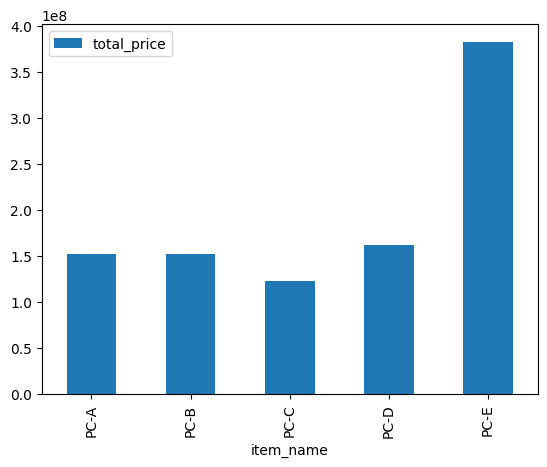

In [345]:
# 바 차트 적용
group_data.plot.bar()


In [ ]:
!pip install matplotlib

  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp311-cp311-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [352]:
pivot_data = pd.pivot_table(
    final_r,
    index='payment_month',
    aggfunc=['sum','mean','min','max','std'],
    values='total_price'
)